In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import psycopg2

con = psycopg2.connect("dbname=test1")

# Users selection

Apply the method on a set of student from a certain course (here 'C00198')


```sql
test1=# select count(*) from coursesusers where course_id like 'C00198';
 count 
-------
    77
(1 row)
```

In [2]:
userslist = pd.read_sql_query("select user_id from coursesusers where course_id like 'C00198';",con=con)
userslist = [u[0] for u in userslist.values if u[0]]

In [27]:
users = pd.read_sql_query("select user_id, creation_date from users \
                            where demo=0 and instructor=0 and administrator=0\
                            and user_id in (%s);" % str(userslist).strip('[]'),con=con)

In [28]:
ids = users['user_id']
l = ids.values.tolist()

In [50]:
import timeit

start = timeit.default_timer()
submissions = pd.read_sql_query("select submission_uid, user_id, problem_id, submission_id, \
                        state, time_out, time_in, veredict, score \
                        from submissions where user_id in \
                        (%s) and problem_id like 'P%%';" % str(l).strip('[]'), 
                       con=con)

stop = timeit.default_timer()

print "It took %.2f seconds to compute the request" % (stop - start)

It took 0.21 seconds to compute the request


In [51]:
# Get rid of language ids
submissions.problem_id = submissions.problem_id.apply(lambda x: x[:-3])

In [52]:
submissions.describe()

,submission_uid,user_id,problem_id,submission_id,state,time_out,time_in,veredict,score
count,25001,25001,25001,25001,25001,25001,25001,25001,135
unique,25001,72,693,44,1,24762,24825,8,17
top,S001457382,U14908,P71839,S001,done,2015-12-07 00:41:29,2015-12-22 13:45:08,AC,100/100
freq,1,2357,265,12137,25001,4,2,12050,45
first,NaN,NaN,NaN,NaN,NaN,2010-09-15 15:37:19,2010-09-15 10:38:24,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2016-02-24 00:05:31,2016-02-24 00:05:22,NaN,NaN


In [53]:
p = submissions.problem_id
# p.groupby((submissions.problem_id)).count().plot(kind="bar")
# plt.show()

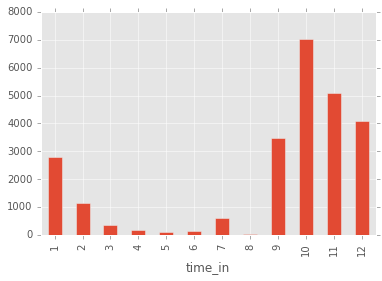

In [54]:
p = submissions.time_in
p.groupby(submissions.time_in.dt.month).count().plot(kind="bar")
plt.show()

In [55]:
veredicts = pd.value_counts(submissions.problem_id)

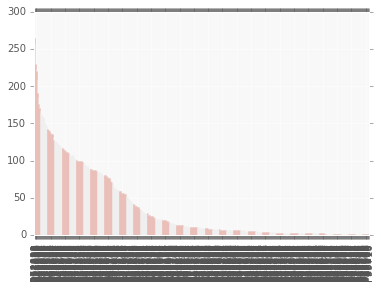

In [56]:
veredicts.plot(kind="bar")
plt.show()

In [57]:
submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25001 entries, 0 to 25000
Data columns (total 9 columns):
submission_uid    25001 non-null object
user_id           25001 non-null object
problem_id        25001 non-null object
submission_id     25001 non-null object
state             25001 non-null object
time_out          25001 non-null datetime64[ns]
time_in           25001 non-null datetime64[ns]
veredict          25001 non-null object
score             135 non-null object
dtypes: datetime64[ns](2), object(7)
memory usage: 1.7+ MB


In [58]:
submissions.dtypes

submission_uid            object
user_id                   object
problem_id                object
submission_id             object
state                     object
time_out          datetime64[ns]
time_in           datetime64[ns]
veredict                  object
score                     object
dtype: object

In [59]:
submissions[['veredict', 'user_id', 'problem_id']]

,veredict,user_id,problem_id
0,WA,U00214,P59164
1,WA,U00214,P59164
2,WA,U00214,P59164
3,AC,U00214,P92183
4,AC,U00214,P25992
5,AC,U00214,P57404
6,AC,U00214,P57404
7,AC,U00214,P57404
8,AC,U00214,P57404
9,AC,U00214,P57404


In [48]:
# submissions.set_index('user_id', inplace=True)